In [13]:
!cat plot_performance.py

import subprocess
import time
from matplotlib import pyplot as plt


def run_experiment(cores_n, steps):
    start = time.time()
    subprocess.call(['python3', 'mp-pi-montecarlo-pool.py',
                     '-w', str(cores_n),
                     '-s', str(steps)])
    end = time.time()

    timespan = end - start
    return timespan


def run_all(cores, steps):
    performance = dict.fromkeys(cores)

    for n in performance.keys():
        performance[n] = run_experiment(n, steps)
        
    speedup = dict.fromkeys(cores)
    baseline = performance[1]
    
    for n in speedup.keys():
        speedup[n] = baseline / performance[n]

    return speedup
    

def plot(speedup):
    plt.plot(*zip(*sorted(speedup.items())), label='Real')
    plt.plot([*speedup], [*speedup], label='Theoretical')
    plt.xlabel('Number of cores')
    plt.ylabel('Speedup')
    plt.legend()
    plt.show()


def main():
    cores = [1, 2, 4, 8, 16, 32]
    steps = 10000000
    speedup = run_all(cores, st

In [8]:
!sbatch --cpus-per-task=2 /opt/local/bin/run_job.sh plot_performance.py

Submitted batch job 4414


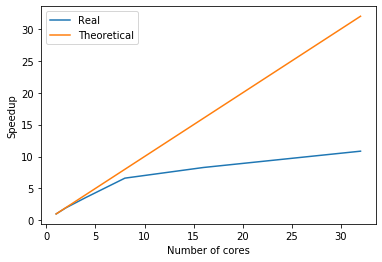

In [14]:
%run plot_performance.py